<a href="https://colab.research.google.com/github/adrianadamata/Data_Science_Analise_Dados_Airbnb_Havai/blob/master/Analisando_os_Dados_do_Airbnb_havai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Havaí - EUA

A primeira versão do [Airbnb](https://www.airbnb.com.br/) foi lançada com apenas uma casa disponível para aluguel, a casa dos próprios criadores do site!
A ideia de alugar um imóvel se expandiu! Hoje, a empresa se entitula como uma rede de economia compartilhada em todo o mundo.

Já não são apenas imóveis cadastrados. A ideia é permitir que qualquer item ocioso possa ser disponibilizado para aluguel. E a Startup cresce cada vez mais, ganhando destaque mundial.

Como iniciativa, a empresa disponibiliza os dados sobre algumas cidades do mundo no [Inside Airbnb](http://insideairbnb.com/get-the-data.html), a fim de viabilizar discussões públicas e análise dos dados para possíveis soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, serão analisados os dados referentes à cidade do Havaí, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/hi/hawaii/2019-12-04/visualisations/listings.csv")

## Análise dos Dados
Para a compreensão do problema é preciso conhecer os significados de cada variável. Para isso, estão listados abaixo os significados das variáveis presentes no arquivo de dados baixado na linha de código anterior, representado por **df**.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de avaliações que a propriedade possui
* `last_review` - data da última avaliação
* `reviews_per_month` - quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [18]:
# mostrar as 5 primeiras entradas
df.head()
df['neighbourhood'].unique()

array(['Hamakua', 'South Kohala', 'South Kona', 'North Kona',
       'Koloa-Poipu', 'North Shore Kauai', 'Puna', 'Kihei-Makena',
       'North Shore Oahu', 'Koolaupoko', 'Lahaina',
       'Primary Urban Center', 'South Hilo', 'Paia-Haiku', 'Kapaa-Wailua',
       'Waianae', 'East Honolulu', 'Koolauloa', 'Ewa', 'North Kohala',
       'Waimea-Kekaha', 'Molokai', 'Wailuku-Kahului', 'Kau',
       'Makawao-Pukalani-Kula', 'Lihue', 'North Hilo', 'Hana',
       'Central Oahu', 'Lanai'], dtype=object)

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Essse dataset baixado é uma versão resumida do Airbnb, o arquivo `listings.csv`. Possui 16 `variáveis` para cada imóvel e 23840 `entradas` que correspondem à quantidade de imóveis anunciados.


In [19]:
# identificar o volume de dados do DataFrame
print("Variáveis: \t {}".format(df.shape[1]))
print("Entradas: \t {}".format(df.shape[0]))

# verificar os tipos de dados de cada entrada do dataset
display(df.dtypes)

Variáveis: 	 16
Entradas: 	 23745


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A quantidade de campos nulos influencia o resultado das análises de um dataset. Os campos nulos não possuem alocação de endereço na memória e tenativas de concatenação podem dar de endereço. Portanto, analisando os valores ausentes podemos ficar atentos:
* As variáves `reviews_per_month` e `last_review` são as que possuem a porcentagem mais alta de campos ausentes, com aproximadamente 23% de entradas nulas;
* A variável `host_name` possui 1,16% de valores ausentes;
* E a variável `name` apresenta porcentagem baixa de campos nulos com 0,07%
* As demais variáveis não apresentam valores ausentes, com uma maior quantidade de dados de entrada.

In [20]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

reviews_per_month                 0.229564
last_review                       0.229564
host_name                         0.011623
name                              0.000674
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3.a Qual o tipo de distribuição das variáveis?** 
Para visualizar as variáveis numéricas, serão utilizados os gráficos de histogramas. Através do histograma é possível ver a distribuição das variáveis numéricas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58e642fe80>,
      dtype=object)

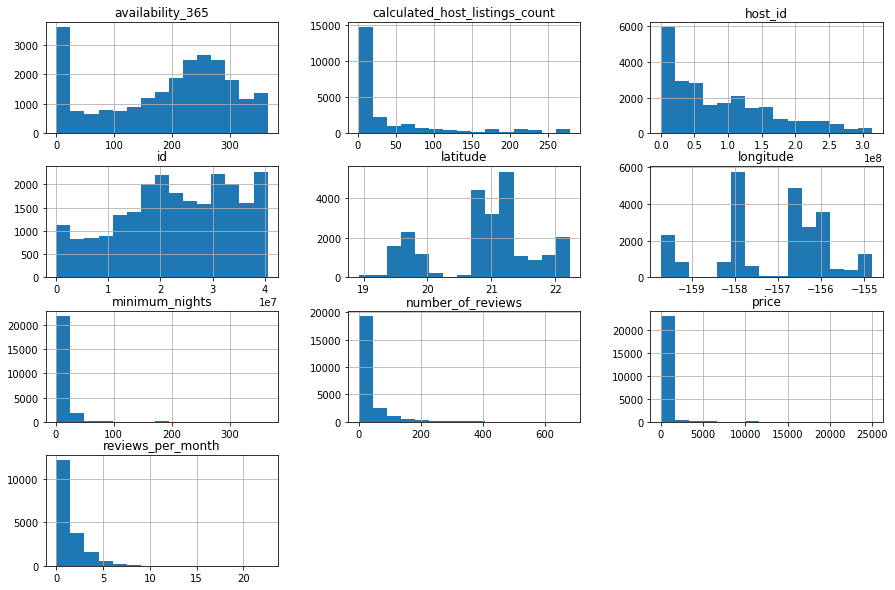

In [21]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))

### Q3.b Há outliers presentes?
É possível observar que as variáveis `minimum_nights` e `price`, possuem valores que não representam uma distribuição. Para confirmar a presença de outliers, iremos utilizar duas técnicas:
* Resumo Estatístico por meio do Método `describe`;
* Plotar `boxplots`;

In [22]:
# ver o resumo estatístico das variáveis numéricas
df[['availability_365','latitude','longitude','minimum_nights','number_of_reviews','price','reviews_per_month']].describe()

,availability_365,latitude,longitude,minimum_nights,number_of_reviews,price,reviews_per_month
count,23745.000000,23745.000000,23745.000000,23745.000000,23745.000000,23745.000000,18294.000000
mean,190.334344,20.881056,-157.128280,5.385597,26.257907,358.380291,1.398526
std,110.226253,0.790525,1.242902,11.176797,46.780110,936.067258,1.523295
min,0.000000,18.920990,-159.714900,1.000000,0.000000,0.000000,0.000000
25%,102.000000,20.690630,-157.837800,1.000000,1.000000,128.000000,0.300000
50%,219.000000,20.952780,-156.688670,3.000000,7.000000,199.000000,0.880000
75%,275.000000,21.300390,-156.380400,5.000000,31.000000,340.000000,2.020000
max,365.000000,22.229110,-154.815770,365.000000,680.000000,24999.000000,22.600000


A partir do resumo estatístico acima é possível observar que:
* Imóveis indisponíveis 


#### Boxplot para `availability_365`

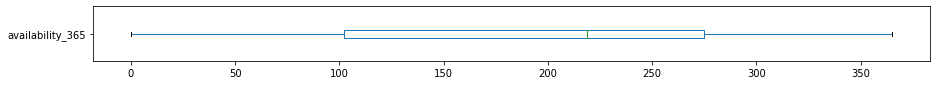

In [29]:
# availability_365
df.availability_365.plot(kind='box', vert=False, figsize=(15, 1))
plt.show()

Não há presença de outliers na variável `availability_365`

#### Boxplot para `minimum_nights`

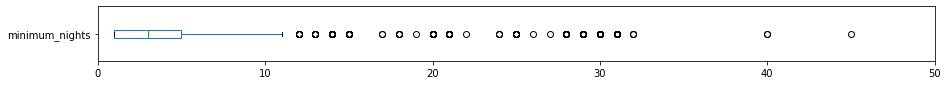

In [34]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, xlim=(0,50), figsize=(15, 1))
plt.show()

In [35]:
# ver quantidade de valores acima de 12 para minimum_nights
print("\n: valores acima de 12")
print("{} entradas".format(len(df[df.minimum_nights > 12])))
print("{:.4f}%".format((len(df[df.minimum_nights > 12]) / df.shape[0])*100))


: valores acima de 12
1917 entradas
8.0733%


Neste caso, verificamos a presença de outliers na variável `minimun_nights`. Há poucas entradas com a característica de mínimo de noites a partir de 12 dias. Estas entradas que correspondem a 8.0733% podem distorcer a distribuição do conjunto de dados.

Neste caso, verificamos a presença de outliers na variável minimum_nights

#### Boxplot para `number_of_reviews`

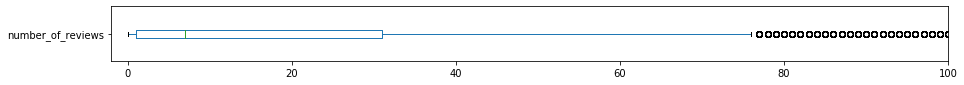

In [45]:
# number_of_reviews
df.number_of_reviews.plot(kind='box', vert=False, xlim=([-2,100]), figsize=(15, 1))
plt.show()

In [46]:
# ver quantidade de valores acima de 78 para number_of_reviews
print("\n: valores acima de 78")
print("{} entradas".format(len(df[df.number_of_reviews > 78])))
print("{:.4f}%".format((len(df[df.number_of_reviews > 78]) / df.shape[0])*100))


: valores acima de 78
2331 entradas
9.8168%


Neste caso, verificamos a presença de outliers na variável `number_of_reviews`. Há poucas entradas com a característica de quantidade de avaliações a partir de 78 avaliações. Estas entradas que correspondem a 9.8168% podem distorcer a distribuição do conjunto de dados.

#### Boxplot para availability_365

#### Boxplot para availability_365

### **Q4. Qual a média dos preços de aluguel?**

In [0]:
# ver a média da coluna `price``


### **Q4. Qual a correlação existente entre as variáveis**

In [0]:
# criar uma matriz de correlação

# mostrar a matriz de correlação


In [0]:
# plotar um heatmap a partir das correlações


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível


In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível


### **Q6. Qual a localidade mais cara do dataset?**



In [0]:
# ver preços por bairros, na média


In [0]:
# plotar os imóveis pela latitude-longitude


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``

## Conclusões
